In [1]:
print('hello world')

hello world


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('D:/AI COURSE/datamites/Machine learning/loan_approved.csv')

In [4]:
df.head

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [9]:
df.isnull().sum().sum()

np.int64(149)

In [10]:
df.isnull().any().sum()

np.int64(7)

In [11]:
df.isnull().sum()          # count nulls per column
df.dtypes                  # data types

Loan_ID                    object
Gender                     object
Married                    object
Dependents                 object
Education                  object
Self_Employed              object
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area              object
Loan_Status (Approved)     object
dtype: object

In [12]:
df.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

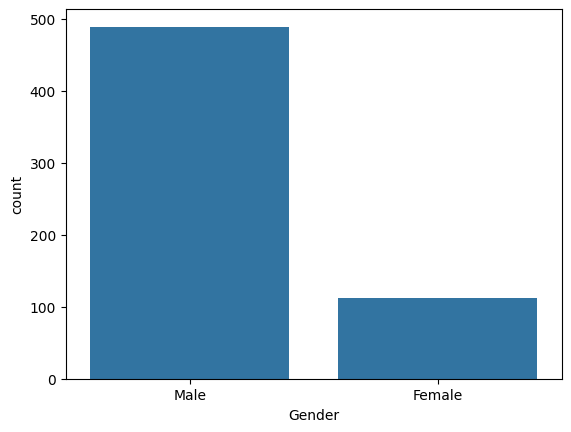

In [13]:
import seaborn as sns
sns.countplot(x= df.Gender)

In [14]:
df.Gender.mode()[0]

'Male'

In [15]:
import warnings
warnings.filterwarnings('ignore')
error=[]
df.Gender.fillna(df.Gender.mode()[0],inplace=True )

In [16]:
import warnings
warnings.filterwarnings('ignore')
error=[]
df.ApplicantIncome.fillna(df.ApplicantIncome.mode()[0],inplace=True )
df.ApplicantIncome.isnull().sum()

np.int64(0)

In [17]:
import warnings
warnings.filterwarnings('ignore')
error=[]
df.CoapplicantIncome.fillna(df.CoapplicantIncome.mode()[0],inplace=True )
df.CoapplicantIncome.isnull().sum()

np.int64(0)

In [18]:
import warnings
warnings.filterwarnings('ignore')
error=[]
df.Property_Area.fillna(df.Property_Area.mode()[0],inplace=True )
df.Property_Area.isnull().sum()

np.int64(0)

In [19]:

df.isnull().any().sum()

np.int64(6)

In [20]:
df.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

<Axes: xlabel='Education', ylabel='count'>

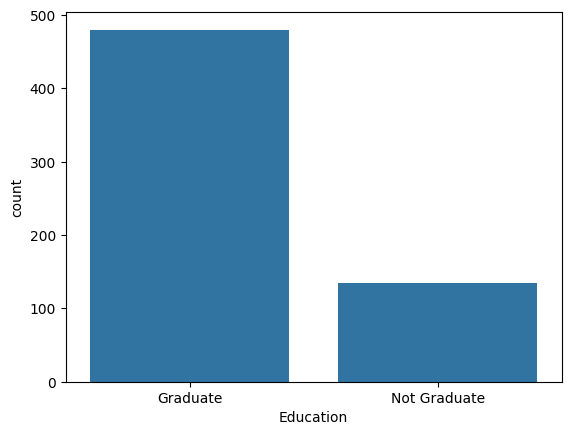

In [21]:
sns.countplot(x= df.Education)

In [22]:
df.Loan_Amount_Term

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [23]:
len(df.Loan_Amount_Term.unique())

11

In [24]:
len(df.LoanAmount.unique())

204

In [25]:
len(df.Credit_History.unique())

3

- Since loanamountterm and credit history have discrete values,we will replace the null values with mode
- For Loanamount we will use mean/median to replace the value.

<Axes: xlabel='LoanAmount'>

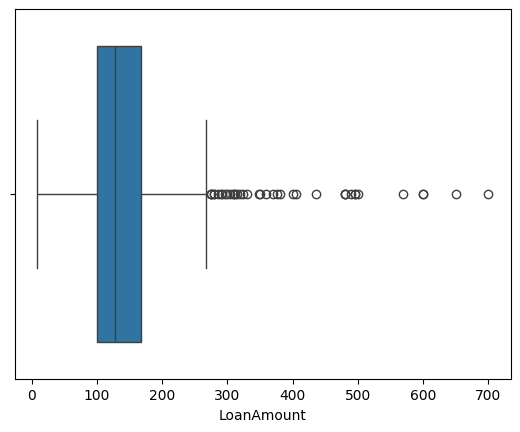

In [26]:
##Finding Outliers
sns.boxplot(x=df.LoanAmount)

Since Loanamount has outliers,we will use median to replace th null values.

In [27]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0],inplace =True)
df.Credit_History.fillna(df.Credit_History.mode()[0],inplace = True)
df.LoanAmount.fillna(df.LoanAmount.mode()[0],inplace = True)
df.Dependents.fillna(df.Dependents.mode()[0],inplace = True)
df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace = True)
df.Married.fillna(df.Married.mode()[0],inplace = True)

In [28]:
df.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

### Encoding
- Conversion of text data to numerical data
- One hot Encoding - Used when feature in Nominal
- Dummy Encoding - Used when feature in Nominal
- Label Encoding
- Ordinal Encoding
- Manual Encoding

In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
df.Gender.value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [31]:
df.Married.unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [33]:
# OHE

gen_encoded = pd.get_dummies(df.Gender, dtype=int)
df = pd.concat([df,gen_encoded], axis=1)

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Female,Male
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1


In [35]:
married_encode = pd.get_dummies(df.Married,dtype=int,drop_first=True)
df = pd.concat([df,married_encode], axis=1)


In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Female,Male,Yes
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,0,1,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,0


In [37]:
se_encode = pd.get_dummies(df.Self_Employed, dtype=int,drop_first=True,prefix='SE')
df = pd.concat([df,se_encode], axis = 1)


In [38]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Female,Male,Yes,SE_Yes
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,0,1,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,1,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,0,0


In [39]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [40]:
# label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Dependents'] = le.fit_transform(df['Dependents'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    object 
 2   Married                 614 non-null    object 
 3   Dependents              614 non-null    int64  
 4   Education               614 non-null    object 
 5   Self_Employed           614 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              614 non-null    float64
 9   Loan_Amount_Term        614 non-null    float64
 10  Credit_History          614 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
 13  Female                  614 non-null    int64  
 14  Male                    614 non-null    in

In [42]:
# Ordinal Encoding

df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [43]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Rural','Semiurban','Urban']])
df[['Property_Area']] = oe.fit_transform(df[['Property_Area']])

In [44]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Female,Male,Yes,SE_Yes
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,2.0,Y,0,1,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0.0,N,0,1,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2.0,Y,0,1,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2.0,Y,0,1,1,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2.0,Y,0,1,0,0


In [45]:
df['Loan_Status (Approved)'].unique()

array(['Y', 'N'], dtype=object)

In [46]:
dict1 = {'Y':1,'N':0}
df['Loan_Status (Approved)'] = df['Loan_Status (Approved)'].map(dict1)

In [47]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Female,Male,Yes,SE_Yes
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,2.0,1,0,1,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0.0,0,0,1,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2.0,1,0,1,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2.0,1,0,1,1,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2.0,1,0,1,0,0


### DEC-1 

#### Outlider Handling

- iQR
- Winsorization

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    object 
 2   Married                 614 non-null    object 
 3   Dependents              614 non-null    int64  
 4   Education               614 non-null    object 
 5   Self_Employed           614 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              614 non-null    float64
 9   Loan_Amount_Term        614 non-null    float64
 10  Credit_History          614 non-null    float64
 11  Property_Area           614 non-null    float64
 12  Loan_Status (Approved)  614 non-null    int64  
 13  Female                  614 non-null    int64  
 14  Male                    614 non-null    in

<Axes: xlabel='ApplicantIncome'>

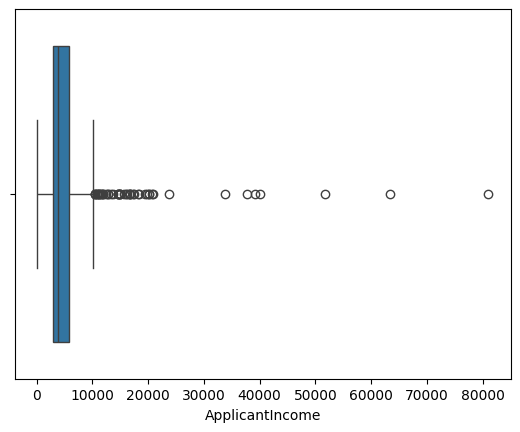

In [49]:
sns.boxplot(x=df.ApplicantIncome)

<Axes: xlabel='CoapplicantIncome'>

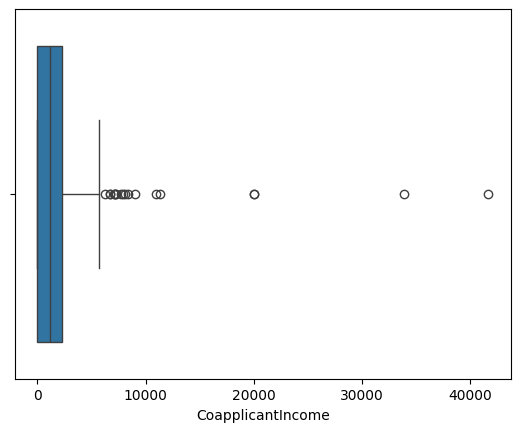

In [50]:
sns.boxplot(x=df.CoapplicantIncome)

<Axes: xlabel='LoanAmount'>

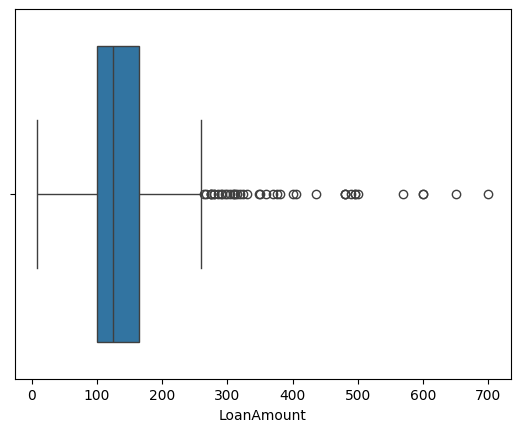

In [51]:
sns.boxplot(x=df.LoanAmount)

In [52]:
# iqr for applicant income

import numpy as np

Q1_AI = np.percentile(df.ApplicantIncome,25)
Q3_AI = np.percentile(df.ApplicantIncome,75)

In [53]:
IQR_AI = Q3_AI-Q1_AI
IQR_AI

np.float64(2917.5)

In [54]:
UB_AI = Q3_AI + 1.5*IQR_AI
LB_AI = Q1_AI - 1.5*IQR_AI

In [55]:
UB_AI

np.float64(10171.25)

In [56]:
LB_AI

np.float64(-1498.75)

In [57]:
df = df.loc[(df.ApplicantIncome>LB_AI)& (df.ApplicantIncome<UB_AI)]
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Female,Male,Yes,SE_Yes
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,2.0,1,0,1,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0.0,0,0,1,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2.0,1,0,1,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2.0,1,0,1,1,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0.0,1,1,0,0,0
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,0.0,1,0,1,1,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,2.0,1,0,1,1,0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,2.0,1,0,1,1,0


<Axes: xlabel='CoapplicantIncome'>

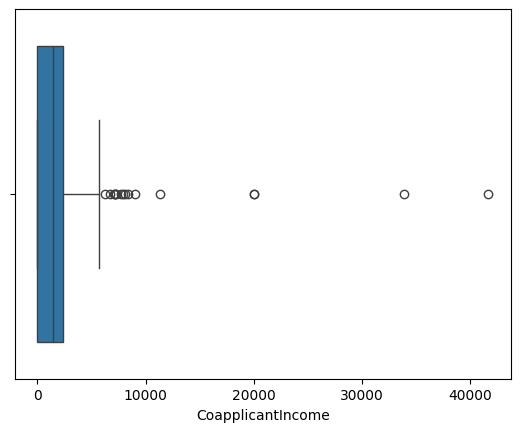

In [58]:
sns.boxplot(x=df.CoapplicantIncome)

In [59]:
from scipy.stats.mstats import winsorize
df['CoapplicantIncome'] = winsorize(df.CoapplicantIncome,limits=0.1)

<Axes: xlabel='CoapplicantIncome'>

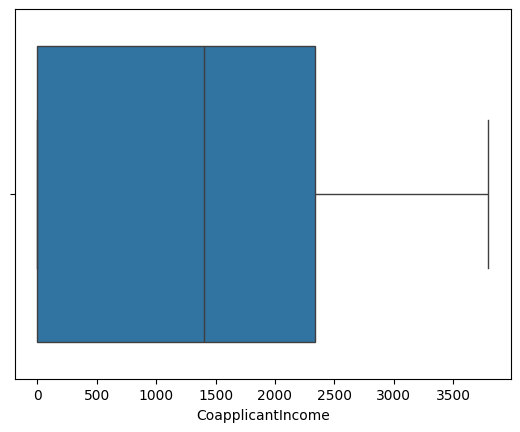

In [60]:
sns.boxplot(x = df.CoapplicantIncome)

In [61]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Female,Male,Yes,SE_Yes
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,2.0,1,0,1,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0.0,0,0,1,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2.0,1,0,1,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2.0,1,0,1,1,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2.0,1,0,1,0,0
